In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
file_path = 'gpay_fraud_transaction_analysis_balanced.csv'
df = pd.read_csv(file_path)
df

In [100]:
mean_transaction_amount = df['Transaction_Amount'].mean()
median_transaction_amount = df['Transaction_Amount'].median()
mode_transaction_amount = df['Transaction_Amount'].mode()[0]
std_dev_transaction_amount = df['Transaction_Amount'].std()

# For User Account Balance
mean_user_balance = df['User_Account_Balance'].mean()
median_user_balance = df['User_Account_Balance'].median()
mode_user_balance = df['User_Account_Balance'].mode()[0]
std_dev_user_balance = df['User_Account_Balance'].std()

# For User Age
mean_user_age = df['User_Age'].mean()
median_user_age = df['User_Age'].median()
mode_user_age = df['User_Age'].mode()[0]
std_dev_user_age = df['User_Age'].std()

In [101]:
print("Transaction Amount - Mean: ", mean_transaction_amount)
print("Transaction Amount - Median: ", median_transaction_amount)
print("Transaction Amount - Mode: ", mode_transaction_amount)
print("Standard deviation Transaction ", std_dev_transaction_amount)

print("\nUser Account Balance - Mean: ", mean_user_balance)
print("User Account Balance - Median: ", median_user_balance)
print("User Account Balance - Mode: ", mode_user_balance)
print("Standard deviation Balance ", std_dev_user_balance)


print("\nUser Age - Mean: ", mean_user_age)
print("User Age - Median: ", median_user_age)
print("User Age - Mode: ", mode_user_age)
print("Standard deviation User Age",std_dev_user_age)


Transaction Amount - Mean:  2518.76318
Transaction Amount - Median:  2540.315
Transaction Amount - Mode:  981.17
Standard deviation Transaction  1449.7272650606794

User Account Balance - Mean:  50402.438799999996
User Account Balance - Median:  50588.16
User Account Balance - Mode:  1112.02
Standard deviation Balance  28712.277359687814

User Age - Mean:  43.12
User Age - Median:  43.0
User Age - Mode:  32
Standard deviation User Age 15.48972452249848


In [102]:
sns.set(style="whitegrid")

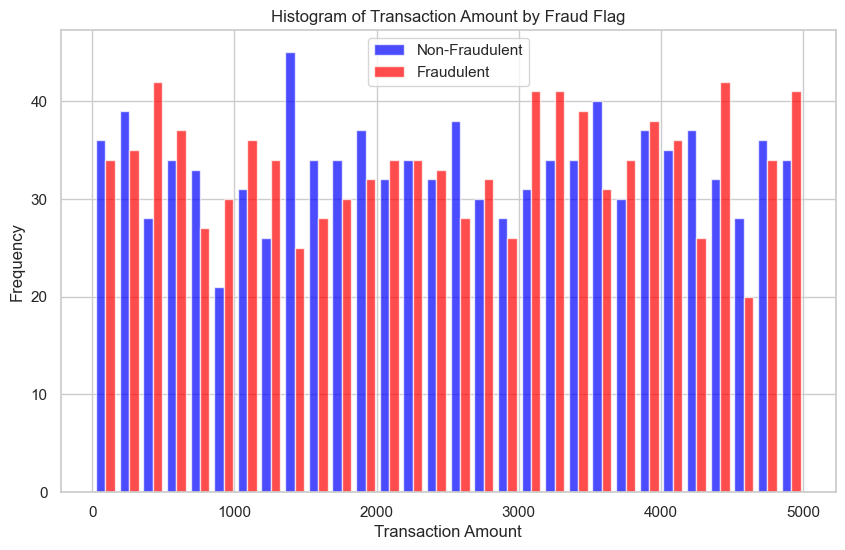

In [103]:
plt.figure(figsize=(10, 6))
plt.hist([df[df['Fraud_Flag'] == 0]['Transaction_Amount'], df[df['Fraud_Flag'] == 1]['Transaction_Amount']],
         bins=30, alpha=0.7, label=['Non-Fraudulent', 'Fraudulent'], color=['blue', 'red'])
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amount by Fraud Flag')
plt.legend()
plt.show()


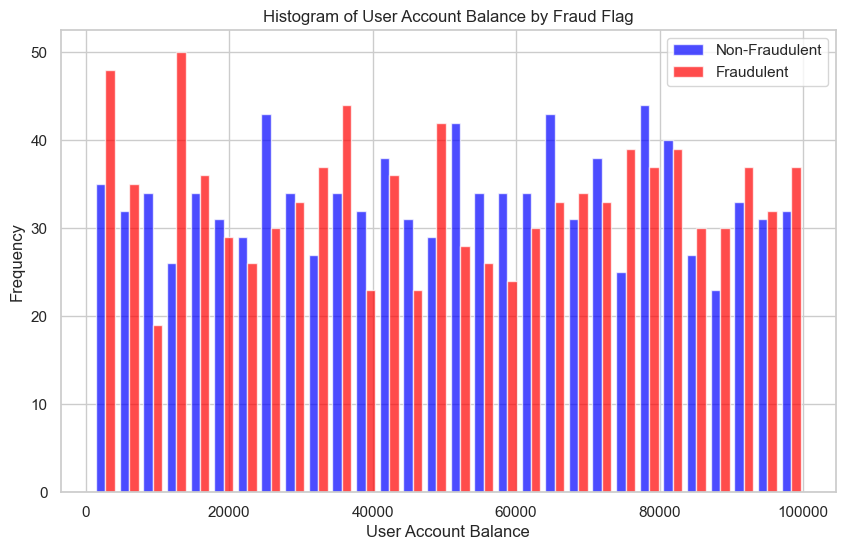

In [104]:
plt.figure(figsize=(10, 6))
plt.hist([df[df['Fraud_Flag'] == 0]['User_Account_Balance'], df[df['Fraud_Flag'] == 1]['User_Account_Balance']],
         bins=30, alpha=0.7, label=['Non-Fraudulent', 'Fraudulent'], color=['blue', 'red'])
plt.xlabel('User Account Balance')
plt.ylabel('Frequency')
plt.title('Histogram of User Account Balance by Fraud Flag')
plt.legend()
plt.show()


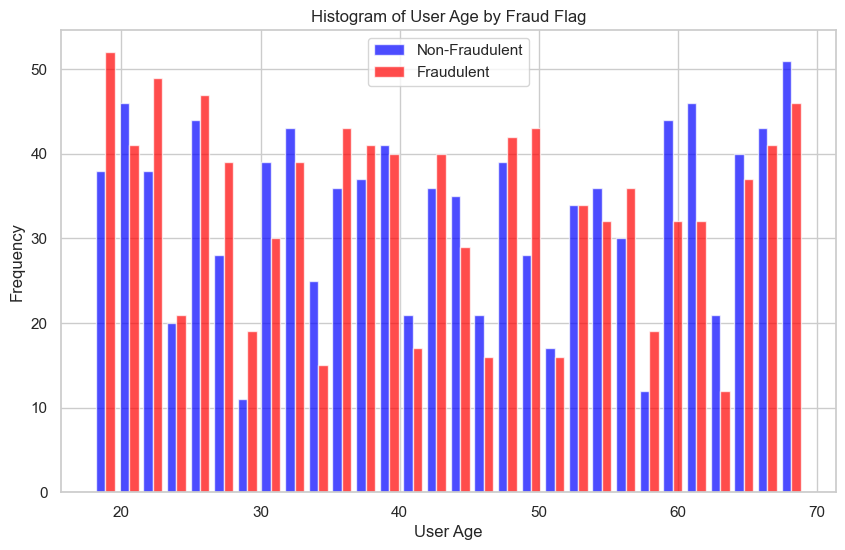

In [105]:
plt.figure(figsize=(10, 6))
plt.hist([df[df['Fraud_Flag'] == 0]['User_Age'], df[df['Fraud_Flag'] == 1]['User_Age']],
         bins=30, alpha=0.7, label=['Non-Fraudulent', 'Fraudulent'], color=['blue', 'red'])
plt.xlabel('User Age')
plt.ylabel('Frequency')
plt.title('Histogram of User Age by Fraud Flag')
plt.legend()
plt.show()


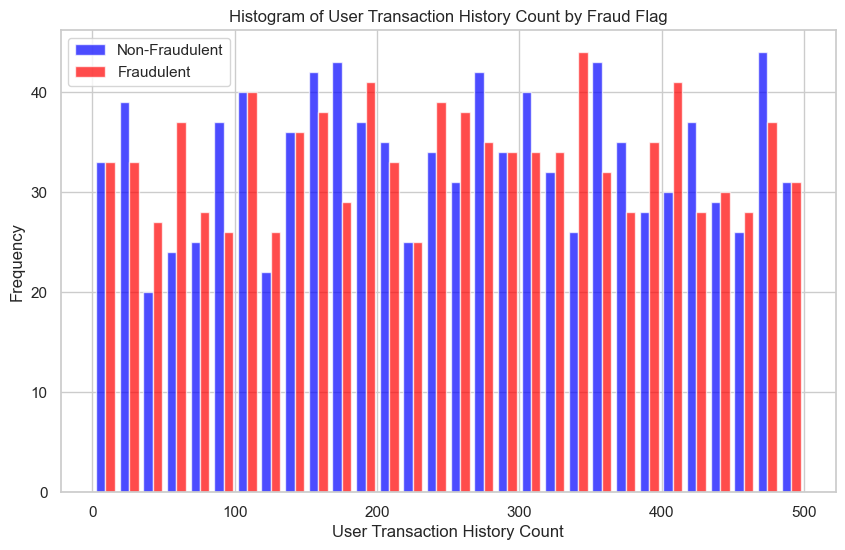

In [106]:
plt.figure(figsize=(10, 6))
plt.hist([df[df['Fraud_Flag'] == 0]['User_Transaction_History_Count'], df[df['Fraud_Flag'] == 1]['User_Transaction_History_Count']],
         bins=30, alpha=0.7, label=['Non-Fraudulent', 'Fraudulent'], color=['blue', 'red'])
plt.xlabel('User Transaction History Count')
plt.ylabel('Frequency')
plt.title('Histogram of User Transaction History Count by Fraud Flag')
plt.legend()
plt.show()


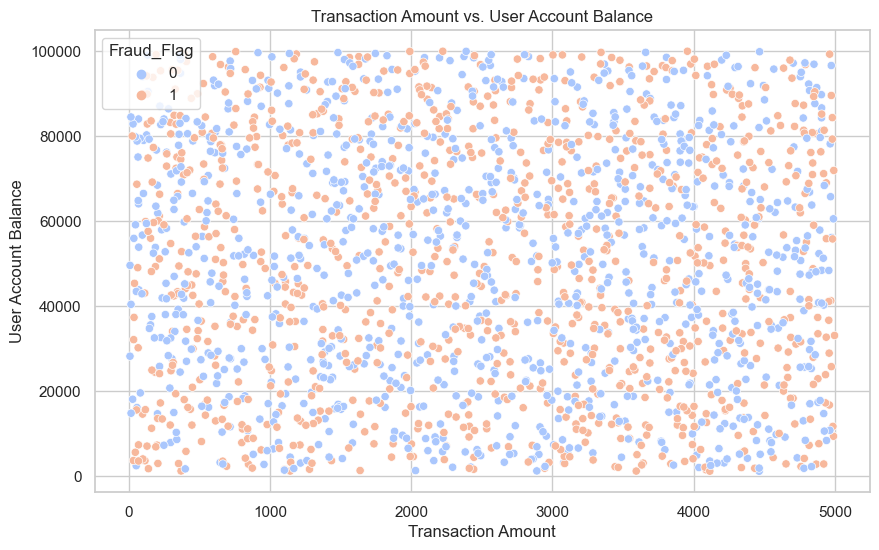

In [107]:
# Scatter plot for Transaction Amount vs. User Account Balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Transaction_Amount', y='User_Account_Balance', data=df, hue='Fraud_Flag', palette='coolwarm')
plt.title('Transaction Amount vs. User Account Balance')
plt.xlabel('Transaction Amount')
plt.ylabel('User Account Balance')
plt.show()

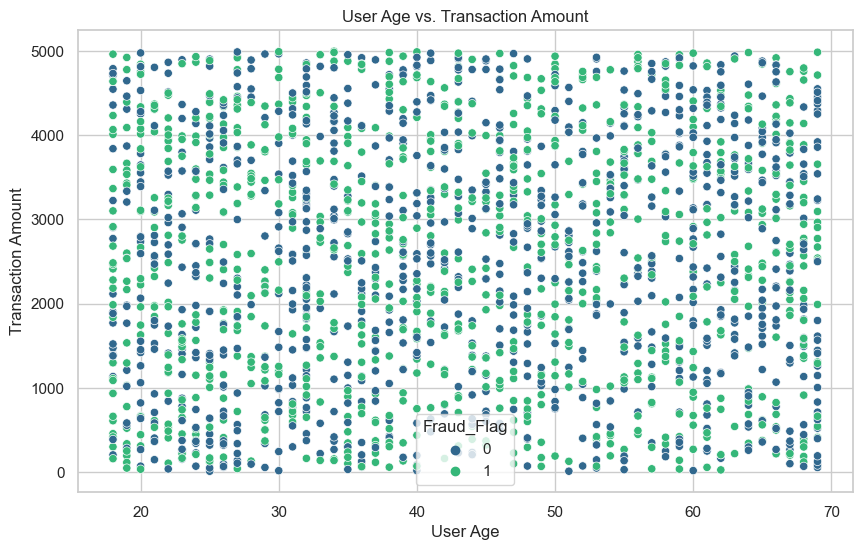

In [108]:
# Scatter plot for User Age vs. Transaction Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='User_Age', y='Transaction_Amount', data=df, hue='Fraud_Flag', palette='viridis')
plt.title('User Age vs. Transaction Amount')
plt.xlabel('User Age')
plt.ylabel('Transaction Amount')
plt.show()

In [109]:

df

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Date,Transaction_Time,Merchant_Name,Merchant_Location,Payment_Method,Transaction_Status,Fraud_Flag,User_Account_Balance,User_Device_Type,User_Transaction_History_Count,User_Age,User_Gender,User_Country,Transaction_Type,Merchant_Category,User_Account_Status
0,TID1221,UID1952,172.31,2024-01-10,05:00:00,Merchant_61,Location_26,Credit Card,Failed,1,93836.42,Android,34,49,Other,UK,Deposit,Travel,Active
1,TID2738,UID1490,680.03,2024-03-13,10:00:00,Merchant_54,Location_32,UPI,Success,0,72443.21,Android,327,29,Male,USA,Purchase,Electronics,Suspended
2,TID1516,UID1103,2840.89,2024-01-22,12:00:00,Merchant_2,Location_40,Credit Card,Pending,1,21173.83,Android,310,45,Other,USA,Transfer,Healthcare,Active
3,TID1019,UID1130,3083.16,2024-01-01,19:00:00,Merchant_57,Location_10,UPI,Pending,1,26863.27,Android,212,26,Female,Canada,Transfer,Fashion,Inactive
4,TID2339,UID1714,228.26,2024-02-25,19:00:00,Merchant_71,Location_8,Credit Card,Failed,0,82706.81,Android,412,24,Male,India,Withdrawal,Grocery,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,TID1068,UID1013,1161.04,2024-01-03,20:00:00,Merchant_66,Location_49,Debit Card,Pending,1,67612.65,iOS,412,30,Female,Germany,Withdrawal,Grocery,Active
1996,TID2142,UID1110,3384.13,2024-02-17,14:00:00,Merchant_1,Location_23,Net Banking,Pending,0,73628.56,Android,305,38,Female,Canada,Withdrawal,Grocery,Inactive
1997,TID2123,UID1183,4142.96,2024-02-16,19:00:00,Merchant_80,Location_10,Net Banking,Success,0,82643.44,iOS,421,39,Other,Germany,Transfer,Healthcare,Inactive
1998,TID2252,UID1230,3174.18,2024-02-22,04:00:00,Merchant_35,Location_37,Debit Card,Success,0,21396.35,iOS,242,47,Female,USA,Purchase,Fashion,Suspended


In [110]:
 df['Transaction_Amount'].fillna(df['Transaction_Amount'].mean(), inplace=True)

In [111]:
columns_to_drop = [
    'Transaction_ID',
    'User_ID',
    'Transaction_Date',
    'Transaction_Time',
    'Merchant_Name',
    'Merchant_Location',
    'User_Gender',
    'User_Country',
    'Transaction_Type',
    'User_Device_Type'
]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [112]:
df

,Transaction_Amount,Payment_Method,Transaction_Status,Fraud_Flag,User_Account_Balance,User_Transaction_History_Count,User_Age,Merchant_Category,User_Account_Status
0,172.31,Credit Card,Failed,1,93836.42,34,49,Travel,Active
1,680.03,UPI,Success,0,72443.21,327,29,Electronics,Suspended
2,2840.89,Credit Card,Pending,1,21173.83,310,45,Healthcare,Active
3,3083.16,UPI,Pending,1,26863.27,212,26,Fashion,Inactive
4,228.26,Credit Card,Failed,0,82706.81,412,24,Grocery,Inactive
...,...,...,...,...,...,...,...,...,...
1995,1161.04,Debit Card,Pending,1,67612.65,412,30,Grocery,Active
1996,3384.13,Net Banking,Pending,0,73628.56,305,38,Grocery,Inactive
1997,4142.96,Net Banking,Success,0,82643.44,421,39,Healthcare,Inactive
1998,3174.18,Debit Card,Success,0,21396.35,242,47,Fashion,Suspended


In [113]:
payment_method_dummies = pd.get_dummies(df['Payment_Method'], prefix='Payment_Method').astype(int)
df = pd.concat([df, payment_method_dummies], axis=1)
df.drop('Payment_Method', axis=1, inplace=True)

In [114]:
df

,Transaction_Amount,Transaction_Status,Fraud_Flag,User_Account_Balance,User_Transaction_History_Count,User_Age,Merchant_Category,User_Account_Status,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Net Banking,Payment_Method_UPI
0,172.31,Failed,1,93836.42,34,49,Travel,Active,1,0,0,0
1,680.03,Success,0,72443.21,327,29,Electronics,Suspended,0,0,0,1
2,2840.89,Pending,1,21173.83,310,45,Healthcare,Active,1,0,0,0
3,3083.16,Pending,1,26863.27,212,26,Fashion,Inactive,0,0,0,1
4,228.26,Failed,0,82706.81,412,24,Grocery,Inactive,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1161.04,Pending,1,67612.65,412,30,Grocery,Active,0,1,0,0
1996,3384.13,Pending,0,73628.56,305,38,Grocery,Inactive,0,0,1,0
1997,4142.96,Success,0,82643.44,421,39,Healthcare,Inactive,0,0,1,0
1998,3174.18,Success,0,21396.35,242,47,Fashion,Suspended,0,1,0,0


In [115]:
transcation_status = pd.get_dummies(df['Transaction_Status'], prefix='Transaction_Status').astype(int)
df = pd.concat([df, transcation_status], axis=1)
df.drop('Transaction_Status', axis=1, inplace=True)

In [116]:
df

,Transaction_Amount,Fraud_Flag,User_Account_Balance,User_Transaction_History_Count,User_Age,Merchant_Category,User_Account_Status,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Net Banking,Payment_Method_UPI,Transaction_Status_Failed,Transaction_Status_Pending,Transaction_Status_Success
0,172.31,1,93836.42,34,49,Travel,Active,1,0,0,0,1,0,0
1,680.03,0,72443.21,327,29,Electronics,Suspended,0,0,0,1,0,0,1
2,2840.89,1,21173.83,310,45,Healthcare,Active,1,0,0,0,0,1,0
3,3083.16,1,26863.27,212,26,Fashion,Inactive,0,0,0,1,0,1,0
4,228.26,0,82706.81,412,24,Grocery,Inactive,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1161.04,1,67612.65,412,30,Grocery,Active,0,1,0,0,0,1,0
1996,3384.13,0,73628.56,305,38,Grocery,Inactive,0,0,1,0,0,1,0
1997,4142.96,0,82643.44,421,39,Healthcare,Inactive,0,0,1,0,0,0,1
1998,3174.18,0,21396.35,242,47,Fashion,Suspended,0,1,0,0,0,0,1


In [117]:
user_account_status = pd.get_dummies(df['User_Account_Status'], prefix='User_Account_Status').astype(int)
df = pd.concat([df, user_account_status], axis=1)
df.drop('User_Account_Status', axis=1, inplace=True)

In [118]:
df

,Transaction_Amount,Fraud_Flag,User_Account_Balance,User_Transaction_History_Count,User_Age,Merchant_Category,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Net Banking,Payment_Method_UPI,Transaction_Status_Failed,Transaction_Status_Pending,Transaction_Status_Success,User_Account_Status_Active,User_Account_Status_Inactive,User_Account_Status_Suspended
0,172.31,1,93836.42,34,49,Travel,1,0,0,0,1,0,0,1,0,0
1,680.03,0,72443.21,327,29,Electronics,0,0,0,1,0,0,1,0,0,1
2,2840.89,1,21173.83,310,45,Healthcare,1,0,0,0,0,1,0,1,0,0
3,3083.16,1,26863.27,212,26,Fashion,0,0,0,1,0,1,0,0,1,0
4,228.26,0,82706.81,412,24,Grocery,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1161.04,1,67612.65,412,30,Grocery,0,1,0,0,0,1,0,1,0,0
1996,3384.13,0,73628.56,305,38,Grocery,0,0,1,0,0,1,0,0,1,0
1997,4142.96,0,82643.44,421,39,Healthcare,0,0,1,0,0,0,1,0,1,0
1998,3174.18,0,21396.35,242,47,Fashion,0,1,0,0,0,0,1,0,0,1


In [119]:
merchant_category = pd.get_dummies(df['Merchant_Category'], prefix='Merchant_Category').astype(int)
df = pd.concat([df,merchant_category], axis=1)
df.drop('Merchant_Category', axis=1, inplace=True)

In [120]:
df

,Transaction_Amount,Fraud_Flag,User_Account_Balance,User_Transaction_History_Count,User_Age,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Net Banking,Payment_Method_UPI,Transaction_Status_Failed,Transaction_Status_Pending,Transaction_Status_Success,User_Account_Status_Active,User_Account_Status_Inactive,User_Account_Status_Suspended,Merchant_Category_Electronics,Merchant_Category_Fashion,Merchant_Category_Grocery,Merchant_Category_Healthcare,Merchant_Category_Travel
0,172.31,1,93836.42,34,49,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,680.03,0,72443.21,327,29,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0
2,2840.89,1,21173.83,310,45,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,3083.16,1,26863.27,212,26,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
4,228.26,0,82706.81,412,24,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1161.04,1,67612.65,412,30,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
1996,3384.13,0,73628.56,305,38,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1997,4142.96,0,82643.44,421,39,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
1998,3174.18,0,21396.35,242,47,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0


In [121]:
df['Transaction_Amount'].fillna(df['Transaction_Amount'].mean(), inplace=True)

In [122]:
scaler = MinMaxScaler()

In [123]:
df['Transaction_Amount'] = scaler.fit_transform(df['Transaction_Amount'].values.reshape(-1, 1))

In [124]:
df

,Transaction_Amount,Fraud_Flag,User_Account_Balance,User_Transaction_History_Count,User_Age,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Net Banking,Payment_Method_UPI,Transaction_Status_Failed,Transaction_Status_Pending,Transaction_Status_Success,User_Account_Status_Active,User_Account_Status_Inactive,User_Account_Status_Suspended,Merchant_Category_Electronics,Merchant_Category_Fashion,Merchant_Category_Grocery,Merchant_Category_Healthcare,Merchant_Category_Travel
0,0.032535,1,93836.42,34,49,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,0.134343,0,72443.21,327,29,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0
2,0.567641,1,21173.83,310,45,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,0.616221,1,26863.27,212,26,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
4,0.043754,0,82706.81,412,24,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.230796,1,67612.65,412,30,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
1996,0.676572,0,73628.56,305,38,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1997,0.828733,0,82643.44,421,39,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
1998,0.634472,0,21396.35,242,47,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0


In [125]:
df['User_Account_Balance'].fillna(df['User_Account_Balance'].mean(), inplace=True)

In [126]:
df['User_Account_Balance'] = scaler.fit_transform(df['User_Account_Balance'].values.reshape(-1, 1))

In [127]:
df

,Transaction_Amount,Fraud_Flag,User_Account_Balance,User_Transaction_History_Count,User_Age,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Net Banking,Payment_Method_UPI,Transaction_Status_Failed,Transaction_Status_Pending,Transaction_Status_Success,User_Account_Status_Active,User_Account_Status_Inactive,User_Account_Status_Suspended,Merchant_Category_Electronics,Merchant_Category_Fashion,Merchant_Category_Grocery,Merchant_Category_Healthcare,Merchant_Category_Travel
0,0.032535,1,0.937914,34,49,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,0.134343,0,0.721520,327,29,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0
2,0.567641,1,0.202927,310,45,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,0.616221,1,0.260476,212,26,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
4,0.043754,0,0.825337,412,24,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.230796,1,0.672659,412,30,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
1996,0.676572,0,0.733510,305,38,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1997,0.828733,0,0.824696,421,39,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
1998,0.634472,0,0.205177,242,47,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0


In [128]:
df.isnull().sum()

Transaction_Amount                0
Fraud_Flag                        0
User_Account_Balance              0
User_Transaction_History_Count    0
User_Age                          0
Payment_Method_Credit Card        0
Payment_Method_Debit Card         0
Payment_Method_Net Banking        0
Payment_Method_UPI                0
Transaction_Status_Failed         0
Transaction_Status_Pending        0
Transaction_Status_Success        0
User_Account_Status_Active        0
User_Account_Status_Inactive      0
User_Account_Status_Suspended     0
Merchant_Category_Electronics     0
Merchant_Category_Fashion         0
Merchant_Category_Grocery         0
Merchant_Category_Healthcare      0
Merchant_Category_Travel          0
dtype: int64

In [129]:
df['User_Transaction_History_Count'] = scaler.fit_transform(df['User_Transaction_History_Count'].values.reshape(-1, 1))

In [130]:
df['User_Age'] = scaler.fit_transform(df['User_Age'].values.reshape(-1, 1))

In [131]:
df

,Transaction_Amount,Fraud_Flag,User_Account_Balance,User_Transaction_History_Count,User_Age,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Net Banking,Payment_Method_UPI,Transaction_Status_Failed,Transaction_Status_Pending,Transaction_Status_Success,User_Account_Status_Active,User_Account_Status_Inactive,User_Account_Status_Suspended,Merchant_Category_Electronics,Merchant_Category_Fashion,Merchant_Category_Grocery,Merchant_Category_Healthcare,Merchant_Category_Travel
0,0.032535,1,0.937914,0.066265,0.607843,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,0.134343,0,0.721520,0.654618,0.215686,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0
2,0.567641,1,0.202927,0.620482,0.529412,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,0.616221,1,0.260476,0.423695,0.156863,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
4,0.043754,0,0.825337,0.825301,0.117647,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.230796,1,0.672659,0.825301,0.235294,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
1996,0.676572,0,0.733510,0.610442,0.392157,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1997,0.828733,0,0.824696,0.843373,0.411765,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
1998,0.634472,0,0.205177,0.483936,0.568627,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0


In [132]:
df.to_csv('gpay_fraud_transaction_analysis_filtered.csv', index=False)

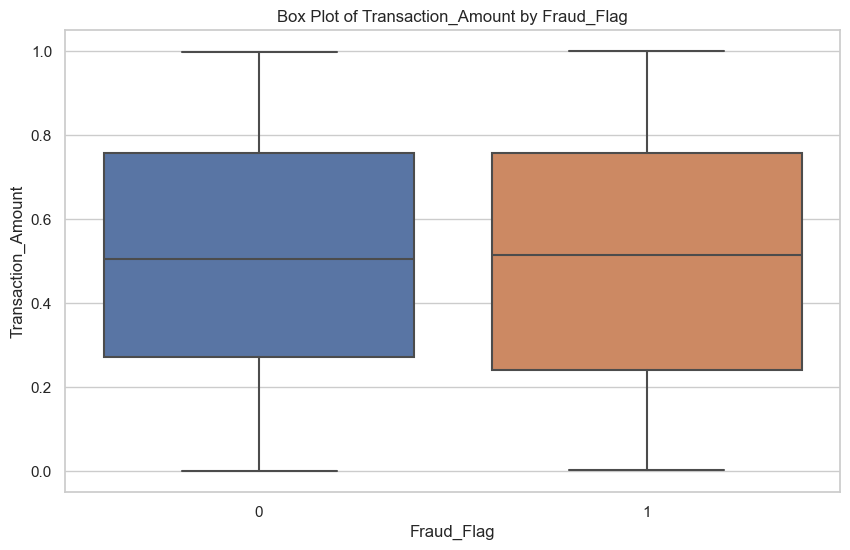

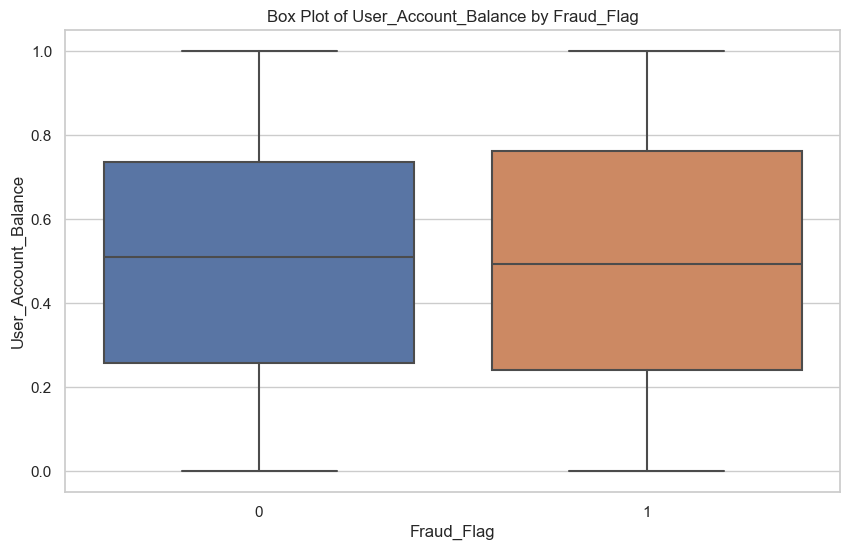

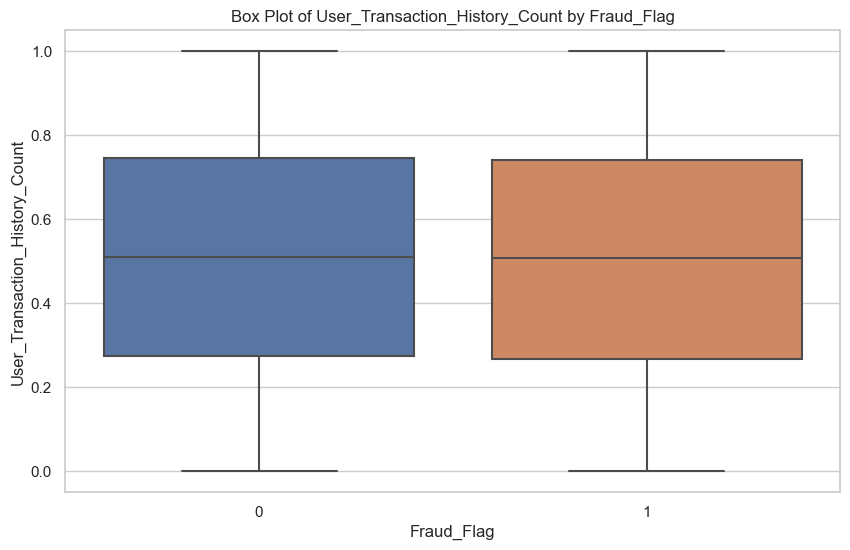

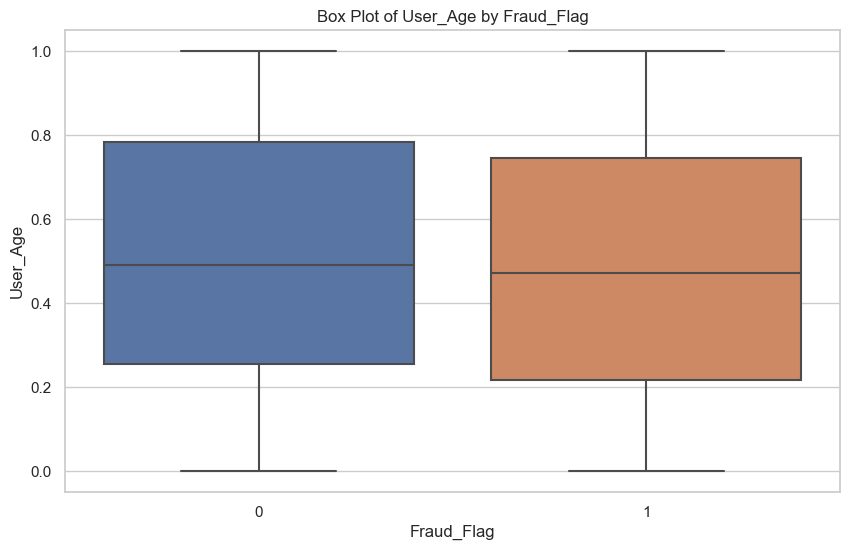

In [133]:
target_variable = 'Fraud_Flag'
continuous_features = ['Transaction_Amount', 'User_Account_Balance', 
                       'User_Transaction_History_Count', 'User_Age']
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target_variable, y=feature, data=df)
    plt.title(f'Box Plot of {feature} by {target_variable}')
    plt.xlabel(target_variable)
    plt.ylabel(feature)
    plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

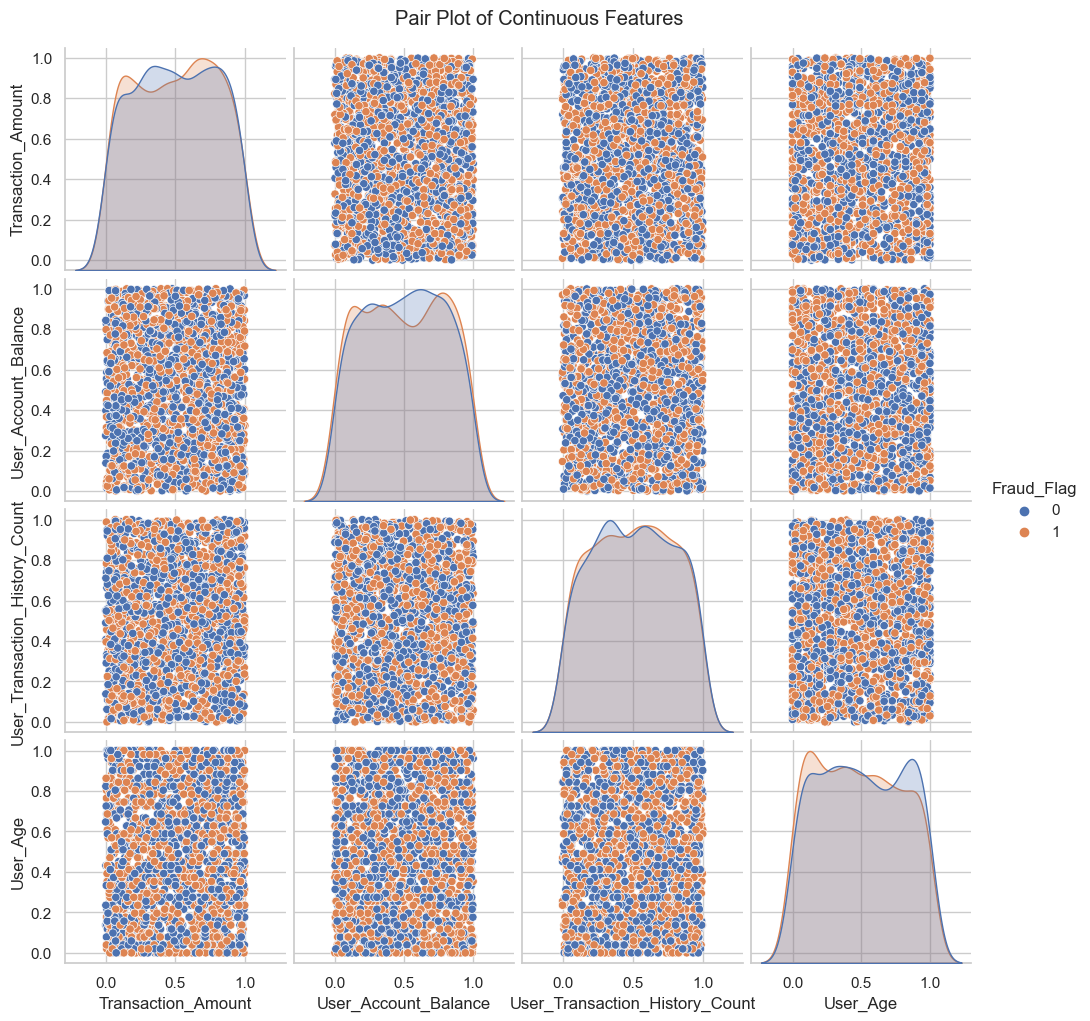

In [134]:
sns.pairplot(df, vars=continuous_features, hue=target_variable, diag_kind='kde')
plt.suptitle('Pair Plot of Continuous Features', y=1.02)
plt.show()

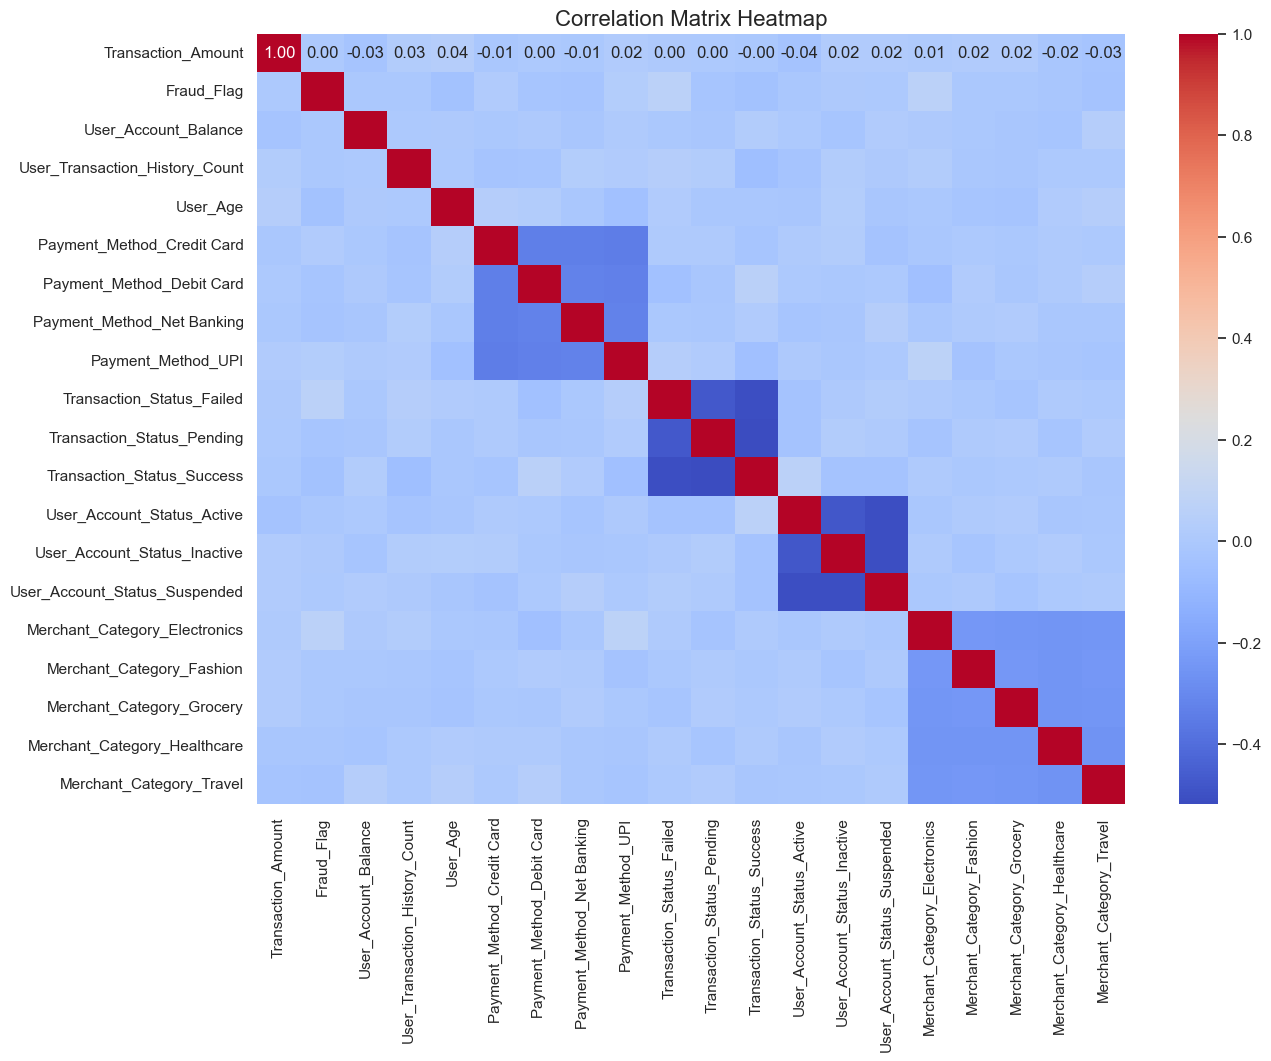

Highly correlated pairs (threshold > 0.7):
Series([], dtype: float64)


In [135]:
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Set the title
plt.title("Correlation Matrix Heatmap", size=16)

# Show the plot
plt.show()

# Optional: Perform correlation analysis by extracting highly correlated pairs
threshold = 0.7
high_corr_pairs = correlation_matrix.unstack().abs().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[(high_corr_pairs > threshold) & (high_corr_pairs < 1)]

print("Highly correlated pairs (threshold > 0.7):")
print(high_corr_pairs)

In [136]:

from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [137]:
df


,Transaction_Amount,Fraud_Flag,User_Account_Balance,User_Transaction_History_Count,User_Age,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Net Banking,Payment_Method_UPI,Transaction_Status_Failed,Transaction_Status_Pending,Transaction_Status_Success,User_Account_Status_Active,User_Account_Status_Inactive,User_Account_Status_Suspended,Merchant_Category_Electronics,Merchant_Category_Fashion,Merchant_Category_Grocery,Merchant_Category_Healthcare,Merchant_Category_Travel
0,0.032535,1,0.937914,0.066265,0.607843,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,0.134343,0,0.721520,0.654618,0.215686,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0
2,0.567641,1,0.202927,0.620482,0.529412,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,0.616221,1,0.260476,0.423695,0.156863,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
4,0.043754,0,0.825337,0.825301,0.117647,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.230796,1,0.672659,0.825301,0.235294,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
1996,0.676572,0,0.733510,0.610442,0.392157,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1997,0.828733,0,0.824696,0.843373,0.411765,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
1998,0.634472,0,0.205177,0.483936,0.568627,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0


In [138]:

X=df.drop("Fraud_Flag",axis=1)
y=df['Fraud_Flag']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)
svm.score(X_train, y_train)

0.5314285714285715

In [141]:
svm_poly = SVC(kernel='poly', degree=4, C = 2.5)
svm_poly.fit(X_train, y_train)
svm_poly.score(X_test, y_test)

0.48

In [142]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.5075, 0.485 , 0.51  , 0.505 , 0.5375])

In [143]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.53

In [144]:
svm_sig = SVC(kernel='sigmoid')
svm_sig.fit(X_train, y_train)
svm_sig.score(X_test, y_test)

0.5216666666666666

In [145]:
from sklearn.decomposition import PCA # Principal Component Analysis--for dimensionality reduction
from mlxtend.plotting import plot_decision_regions

In [146]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

0.52

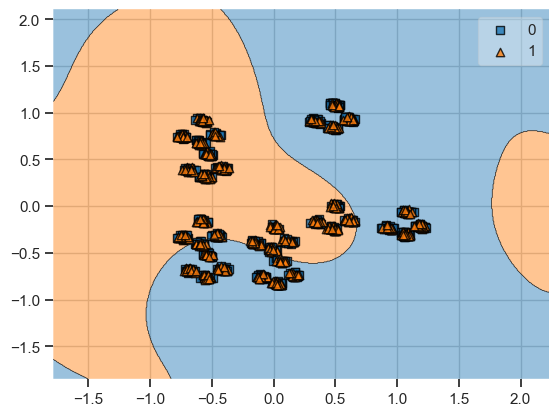

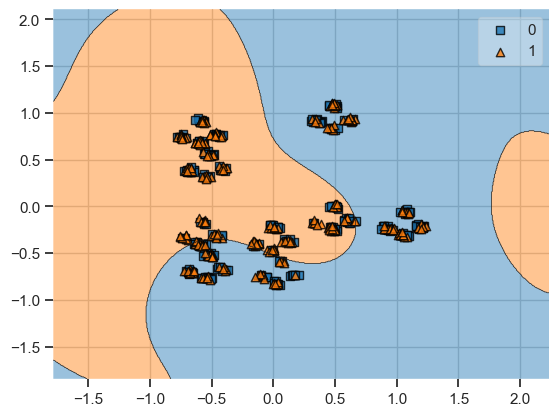

In [147]:
y_train = np.array(y_train)
y_test = np.array(y_test)
svm_pca = SVC()
svm_pca.fit(x_train_pca, y_train)
plot_decision_regions(x_train_pca, y_train, clf=svm_pca)
plt.figure()
plot_decision_regions(x_test_pca, y_test, clf=svm_pca)
svm_pca.score(x_test_pca, y_test)

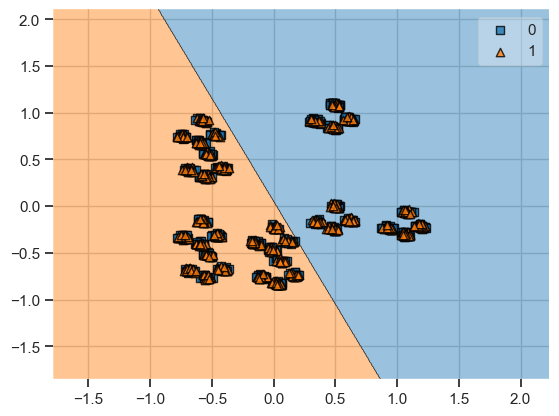

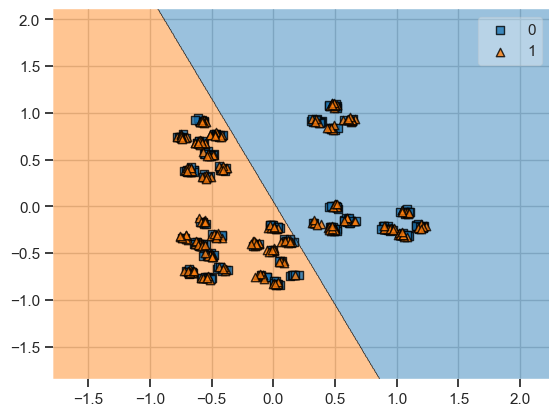

0.5283333333333333

In [148]:
svm_pca_linear = SVC(kernel='linear')
svm_pca_linear.fit(x_train_pca, y_train)
plot_decision_regions(x_train_pca, y_train, clf=svm_pca_linear)
plt.figure()
plot_decision_regions(x_test_pca, y_test, clf=svm_pca_linear)
plt.show()
svm_pca_linear.score(x_test_pca, y_test)

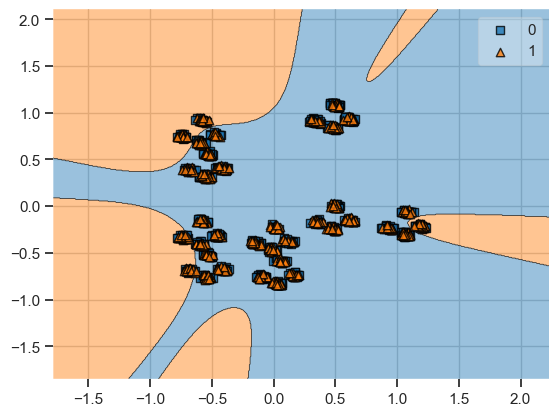

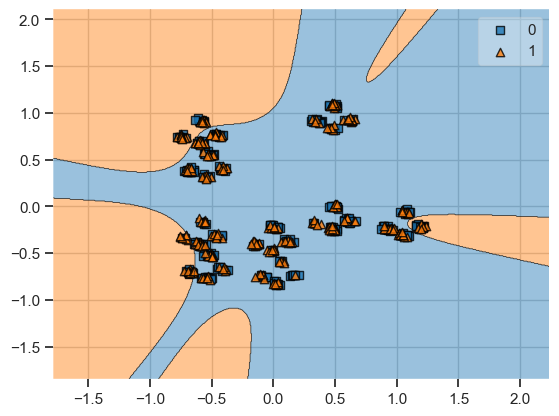

0.485

In [149]:
svm_pca_poly = SVC(kernel='poly', degree=7)
svm_pca_poly.fit(x_train_pca, y_train)
plot_decision_regions(x_train_pca, y_train, clf=svm_pca_poly)
plt.figure()
plot_decision_regions(x_test_pca, y_test, clf=svm_pca_poly)
plt.show()
svm_pca_poly.score(x_test_pca, y_test)

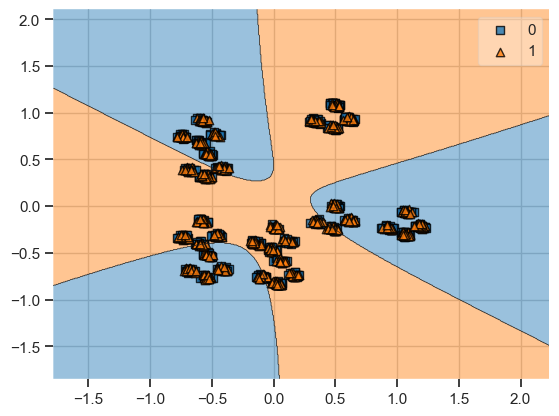

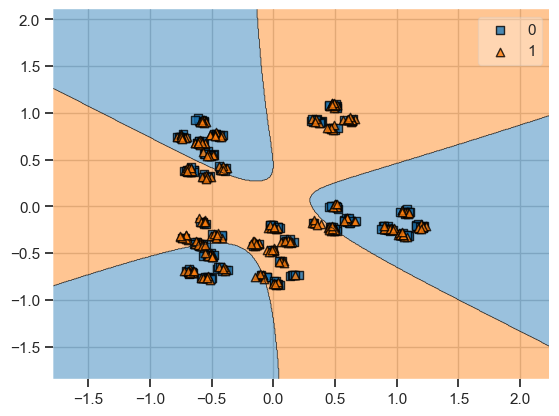

0.5316666666666666

In [150]:
svm_pca_sig = SVC(kernel='sigmoid')
svm_pca_sig.fit(x_train_pca, y_train)
plot_decision_regions(x_train_pca, y_train, clf=svm_pca_sig)
plt.figure()
plot_decision_regions(x_test_pca, y_test, clf=svm_pca_sig)
plt.show()
svm_pca_sig.score(x_test_pca, y_test)

In [151]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [152]:
score_svm =cross_val_score(SVC(gamma='auto'),df, df['Fraud_Flag'],cv=3)

print(score_svm)

print("Avg :",np.average(score_svm))

[1. 1. 1.]
Avg : 1.0


In [153]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

In [154]:
svc = SVC()

In [155]:
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [156]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

In [157]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score:  0.5414285714285715


In [158]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [159]:
print("\nClassification report:\n", classification_report(y_test, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.51      0.62      0.56       288
           1       0.56      0.45      0.50       312

    accuracy                           0.53       600
   macro avg       0.53      0.53      0.53       600
weighted avg       0.53      0.53      0.53       600



In [160]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [161]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 52.83%


In [162]:
conf_matrix = confusion_matrix(y_test, y_pred)

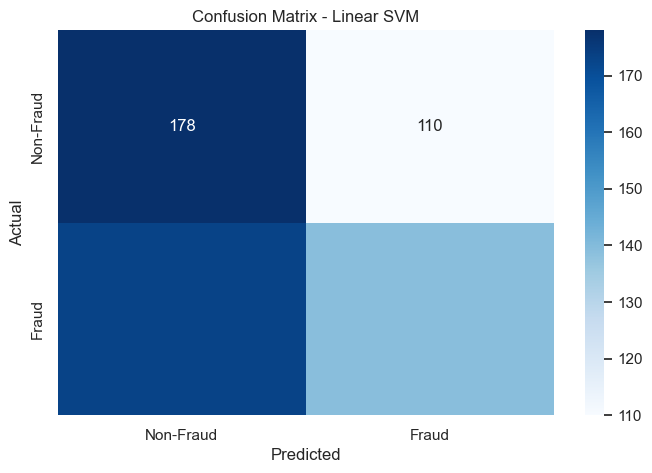

In [163]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix - Linear SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()